## Pymaceutical Analysis
* Out of the four trial groups analyzed, the group of mice on **Capomulin** experienced the greatest tumor volume reduction (as the only analyzed group to see a mean reduction), smallest increase in number of metastatic sites, and greatest survival rate.
* The group of mice on **Ketapril** produced tumor volume / number of metastatic sites / survival rate mean results within the same standard error of the group of mice on the **Placebo**.  This indicates that **Ketapril** may not be effective in fighting cancer growth.
* The group of mice on **Infubinol** did not produce significantly better results than the **Placebo** for tumor volume, but did outperform the **Placebo** when looking at metastatic site change.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_trial_data = pd.merge(clinical_trial_data, mouse_drug_data, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
drug_timept_group = mouse_trial_data.groupby(['Drug', 'Timepoint'])
drug_timept_vol_mean_df = (drug_timept_group['Tumor Volume (mm3)'].mean()).reset_index()

# Preview DataFrame
drug_timept_vol_mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_timept_vol = drug_timept_group['Tumor Volume (mm3)'].apply(list)
drug_timept_vol_list = drug_timept_vol.tolist()
drug_timept_vol_sem = [sem(s) for s in drug_timept_vol_list]

# Convert to DataFrame
drug_timept_vol_sem_df = pd.DataFrame(drug_timept_vol)
drug_timept_vol_sem_df['Tumor Volume (mm3)'] = drug_timept_vol_sem
drug_timept_vol_sem_df = drug_timept_vol_sem_df.reset_index()

# Preview DataFrame
drug_timept_vol_sem_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Mean Data Frame
drug_timept_vol_mean_pivot = drug_timept_vol_mean_df.pivot(index='Timepoint', columns='Drug',
                                                        values='Tumor Volume (mm3)')

# Preview that Reformatting worked
drug_timept_vol_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the SEM Data Frame
drug_timept_vol_sem_pivot = drug_timept_vol_sem_df.pivot(index='Timepoint', columns='Drug',
                                                        values='Tumor Volume (mm3)')

# Preview that Reformatting worked
drug_timept_vol_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


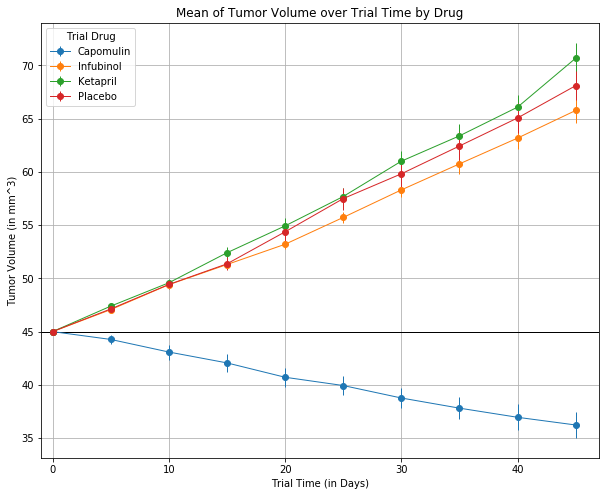

In [6]:
# Generate the Plot (with Error Bars)
drugs_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x_axis = drug_timept_vol_mean_pivot.index.tolist()

fig, ax = plt.subplots(figsize=(10,8))

def tumor_vol_errorbar(column_name):
    ax.errorbar(x_axis, (drug_timept_vol_mean_pivot.loc[:, column_name]).tolist(),
             (drug_timept_vol_sem_pivot.loc[:, column_name]).tolist(), fmt="o-", linewidth=1)

for drug in drugs_list:
    tumor_vol_errorbar(drug)
    
plt.title('Mean of Tumor Volume over Trial Time by Drug')
plt.xlabel("Trial Time (in Days)")
plt.ylabel("Tumor Volume (in mm^3)")
plt.xlim(-1, max(x_axis) + 2)
plt.grid()
plt.legend(drugs_list, title='Trial Drug')
plt.hlines(45, -1, 47, linewidth=1)

# Save the Figure
plt.savefig('tumor_vol_errorbar.png', bbox='tight')

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
drug_timept_meta_mean_df = (drug_timept_group['Metastatic Sites'].mean()).reset_index()

# Preview DataFrame
drug_timept_meta_mean_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_timept_meta = drug_timept_group['Metastatic Sites'].apply(list)
drug_timept_meta_list = drug_timept_meta.tolist()
drug_timept_meta_sem = [sem(s) for s in drug_timept_meta_list]

# Convert to DataFrame
drug_timept_meta_sem_df = pd.DataFrame(drug_timept_meta)
drug_timept_meta_sem_df['Metastatic Sites'] = drug_timept_meta_sem
drug_timept_meta_sem_df = drug_timept_meta_sem_df.reset_index()

# Preview DataFrame
drug_timept_meta_sem_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [9]:
# Minor Data Munging to Re-Format the Mean Data Frame
drug_timept_meta_mean_pivot = drug_timept_meta_mean_df.pivot(index='Timepoint', columns='Drug',
                                                        values='Metastatic Sites')

# Preview that Reformatting worked
drug_timept_meta_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the SEM Data Frame
drug_timept_meta_sem_pivot = drug_timept_meta_sem_df.pivot(index='Timepoint', columns='Drug',
                                                        values='Metastatic Sites')

# Preview that Reformatting worked
drug_timept_meta_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


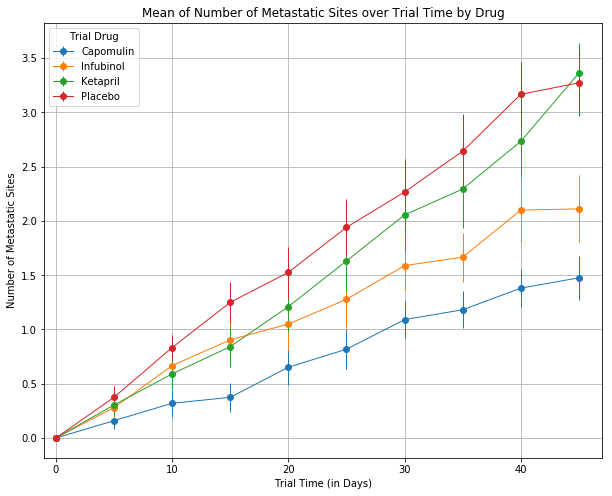

In [11]:
# Generate the Plot (with Error Bars)
# Show the Figure
fig1, ax1 = plt.subplots(figsize=(10,8))

def meta_sites_errorbar(column_name):
    ax1.errorbar(x_axis, (drug_timept_meta_mean_pivot.loc[:, column_name]).tolist(),
             (drug_timept_meta_sem_pivot.loc[:, column_name]).tolist(), fmt="o-", linewidth=1)

for drug in drugs_list:
    meta_sites_errorbar(drug)
    
plt.title('Mean of Number of Metastatic Sites over Trial Time by Drug')
plt.xlabel("Trial Time (in Days)")
plt.ylabel("Number of Metastatic Sites")
plt.xlim(-1, max(x_axis) + 2)
plt.grid()
plt.legend(drugs_list, title='Trial Drug');

# Save the Figure
plt.savefig('meta_sites_errorbar.png', bbox='tight')

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
drug_timept_mouse_count_df = (drug_timept_group['Mouse ID'].count()).reset_index()
drug_timept_mouse_count_df = drug_timept_mouse_count_df.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
drug_timept_mouse_count_df.head(10)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [13]:
# Minor Data Munging to Re-Format the Data Frames
drug_timept_mouse_count_pivot = drug_timept_mouse_count_df.pivot(index='Timepoint', columns='Drug',
                                                        values='Mouse Count')

# Preview that Reformatting worked
drug_timept_mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


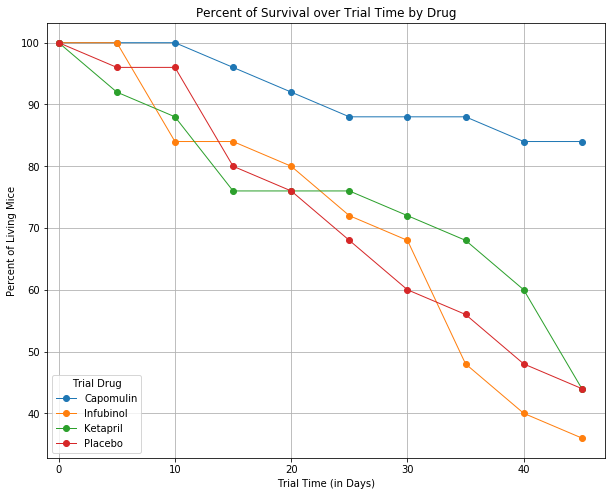

In [14]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,8))

drug_timept_mouse_perc_pivot = (drug_timept_mouse_count_pivot / drug_timept_mouse_count_pivot.iloc[0, :]) * 100

def mouse_perc_plot(column_name):
    plt.plot(x_axis, (drug_timept_mouse_perc_pivot.loc[:, column_name]).tolist(), marker="o", linewidth=1)

# Show the Figure
for drug in drugs_list:
    mouse_perc_plot(drug)
    
plt.title('Percent of Survival over Trial Time by Drug')
plt.xlabel("Trial Time (in Days)")
plt.ylabel("Percent of Living Mice")
plt.xlim(-1, max(x_axis) + 2)
plt.grid()
plt.legend(drugs_list, title='Trial Drug', loc='lower left');

# Save the Figure
plt.savefig('mouse_perc_plot.png', bbox='tight')

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
drug_timept_vol_mean_df = drug_timept_vol_mean_df.set_index('Drug')
drug_vol_mean_change = ((drug_timept_vol_mean_df.loc[drug_timept_vol_mean_df['Timepoint'] == 45, 'Tumor Volume (mm3)'] - \
    drug_timept_vol_mean_df.loc[drug_timept_vol_mean_df['Timepoint'] == 0, 'Tumor Volume (mm3)']) / \
    drug_timept_vol_mean_df.loc[drug_timept_vol_mean_df['Timepoint'] == 0, 'Tumor Volume (mm3)']) * 100

# Display the data to confirm
drug_vol_mean_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

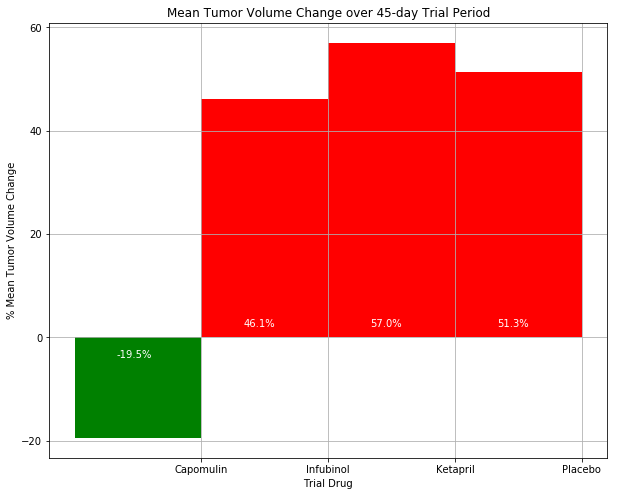

In [18]:
# Store all Relevant Percent Changes into a Tuple
drug_vol_mean_change_tuple = tuple(drug_vol_mean_change[drugs_list])

# Splice the data between passing and failing drugs
colors = []
y_text = []
for i in drug_vol_mean_change_tuple:
    if i < 0:
        colors.append('green')
        y_text.append(-4)
    else:
        colors.append('red')
        y_text.append(2)

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,8))
plt.bar(drugs_list, drug_vol_mean_change_tuple, color=colors, width=(-1), align='edge')
plt.grid()
plt.yticks(np.arange(round(min(drug_vol_mean_change_tuple), -1), \
                     round(max(drug_vol_mean_change_tuple) + 10, -1), 20))
plt.title("Mean Tumor Volume Change over 45-day Trial Period")
plt.xlabel("Trial Drug")
plt.ylabel("% Mean Tumor Volume Change")

# Use functions to label the percentages of changes
perc_index = 0

for _ in drugs_list: 
    plt.text(-0.67 + perc_index, y_text[perc_index], \
             f'{round(drug_vol_mean_change_tuple[perc_index], 1)}%', color='white')
    perc_index += 1

# Save the Figure
plt.savefig('tumor_change_barplot.png', bbox='tight')